In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
#Pour avoir l'auto complétion:
%config IPCompleter.greedy=True  

In [40]:
data=pd.read_csv('preprocessed_CAC40.csv',index_col='Date',parse_dates=True)

In [41]:
data=data[data['Name'] == 'Saint-Gobain']
data.head()

,Unnamed: 0,Name,Open,Closing_Price,Daily_High,Daily_Low,Volume
Date,,,,,,,
2020-04-02,67598,Saint-Gobain,21.55,21.80,21.84,21.55,410
2020-04-01,67599,Saint-Gobain,21.38,21.44,21.69,21.38,"2,492"
2020-03-31,67600,Saint-Gobain,21.46,21.89,22.12,21.46,679
2020-03-30,67601,Saint-Gobain,21.95,21.39,22.10,21.31,310
2020-03-27,67602,Saint-Gobain,22.59,21.78,22.59,21.64,"4,046"


In [42]:

data['Buy'] = np.zeros(len(data))
data['Sell'] = np.zeros(len(data))

In [43]:
data['RollingMax'] = data['Open'].shift(1).rolling(window=30).max()
data['RollingMin'] = data['Open'].shift(1).rolling(window=30).min()
data.loc[data['RollingMax'] < data['Open'], 'Buy'] = 1
data.loc[data['RollingMin'] > data['Open'], 'Sell'] = -1

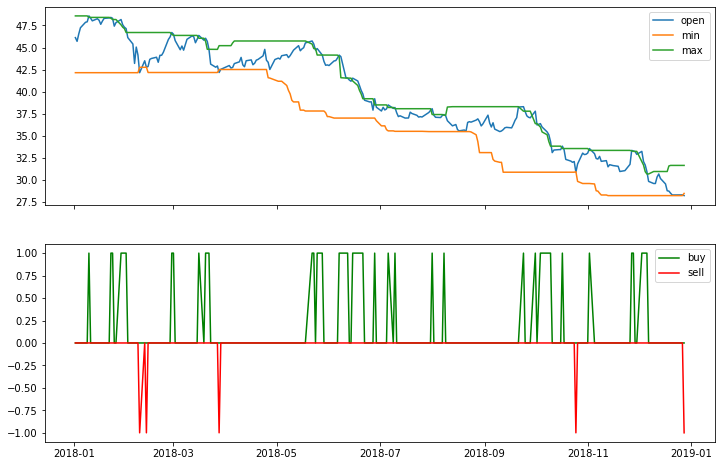

In [44]:
start ='2018'
end='2018'
fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
#plt.figure(figsize=(12, 8))
##plt.subplot(211)
ax[0].plot(data['Open'][start:end])
ax[0].plot(data['RollingMin'][start:end])
ax[0].plot(data['RollingMax'][start:end])
ax[0].legend(['open', 'min', 'max'])
ax[1].plot(data['Buy'][start:end], c='g')
ax[1].plot(data['Sell'][start:end], c='r')
ax[1].legend(['buy', 'sell'])

In [45]:
def tortue(data, annee):
    data['Buy'] = np.zeros(len(data))
    data['Sell'] = np.zeros(len(data))
    data['RollingMax'] = data['Open'].shift(1).rolling(window=30).max()
    data['RollingMin'] = data['Open'].shift(1).rolling(window=30).min()
    data.loc[data['RollingMax'] < data['Open'], 'Buy'] = 1
    data.loc[data['RollingMin'] > data['Open'], 'Sell'] = -1
    start =annee
    end=annee
    fig, ax = plt.subplots(2, figsize=(12, 8), sharex=True)
    ax[0].plot(data['Open'][start:end])
    ax[0].plot(data['RollingMin'][start:end])
    ax[0].plot(data['RollingMax'][start:end])
    ax[0].legend(['open', 'min', 'max'])
    ax[1].plot(data['Buy'][start:end], c='g')
    ax[1].plot(data['Sell'][start:end], c='r')
    ax[1].legend(['buy', 'sell'])

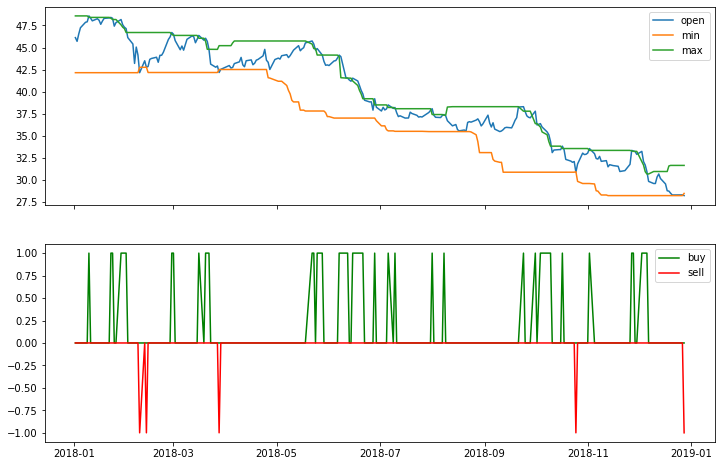

In [46]:
tortue(data, '2018')